In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
blobs=pd.read_excel('/content/drive/MyDrive/DataMining/kmeans.xlsx')
colnames=list(blobs.columns[1:-1])
blobs.head()

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


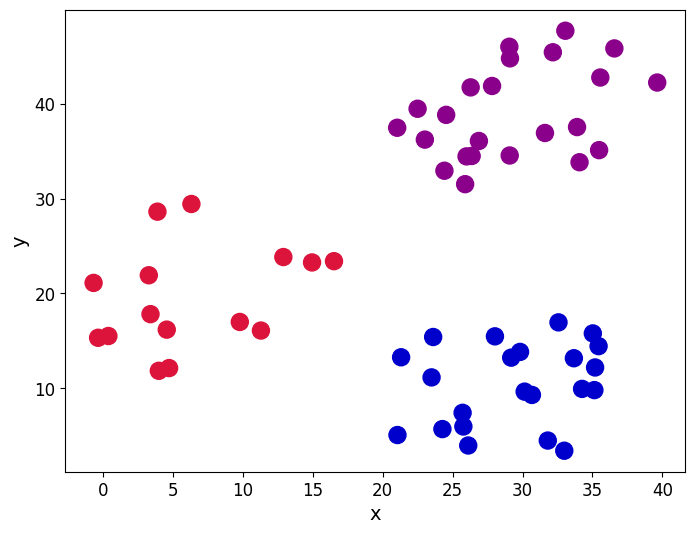

In [ ]:
customcmap=ListedColormap(["crimson","mediumblue","darkmagenta"])
fig,ax=plt.subplots(figsize=(8,6))
plt.scatter(x=blobs['x'],y=blobs['y'],s=150,c=blobs['cluster'].astype('category'),cmap=customcmap)

ax.set_xlabel(r'x',fontsize=14)
ax.set_ylabel(r'y',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
def initiate_centroids(k,dset):
  centroids=dset.sample(k)
  return centroids

np.random.seed(42)
k=3
df=blobs[['x','y']]
centroids=initiate_centroids(k,df)
centroids


,x,y
0,24.412,32.932
5,25.893,31.515
36,26.878,36.069


In [ ]:
def rsserr(a,b):
  return np.square(np.sum((a-b)**2))

for i,centroid in enumerate(range(centroids.shape[0])):
  err=rsserr(centroids.iloc[centroid,:],df.iloc[36,:])
  print('Error for centroid {0} : {1:.2f}'.format(i,err))

Error for centroid 0 : 253.51
Error for centroid 1 : 471.29
Error for centroid 2 : 0.00


In [ ]:
def centroid_assignation (dset, centroids):

  k =centroids.shape[0]
  n=dset.shape[0]
  assignation= []
  assign_errors= []
  for obs in range (n) :
    all_errors= np.array([])
    for centroid in range (k):
       err =rsserr (centroids.iloc[centroid, :], dset.iloc[obs, :])
       all_errors= np.append(all_errors, err)

    nearest_centroid = np.where (all_errors== np.amin (all_errors))[0].tolist ()[0]
    nearest_centroid_error= np.amin (all_errors)
    assignation.append (nearest_centroid)
    assign_errors.append(nearest_centroid_error)
  return assignation, assign_errors


In [ ]:
df['centroid'],df['error']=centroid_assignation(df,centroids)
df.head()

<ipython-input-39-20d1f1802177>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'],df['error']=centroid_assignation(df,centroids)


,x,y,centroid,error
0,24.412,32.932,0,0.000000
1,35.190,12.189,1,211534.211314
2,26.288,41.718,2,1040.662501
3,0.376,15.506,0,776856.744109
4,26.116,3.963,1,576327.599678


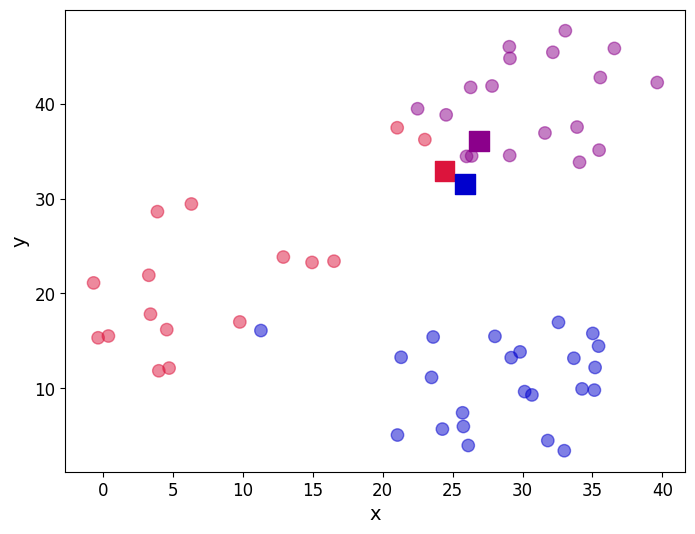

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
plt.scatter(df.iloc[:,0],df.iloc[:,1],marker='o',c=df['centroid'].astype('category'),cmap=customcmap,s=80,alpha=0.5)

plt.scatter(centroids.iloc[:,0],centroids.iloc[:,1],marker='s',s=200,c=[0,1,2],cmap=customcmap)
ax.set_xlabel(r'x',fontsize=14)
ax.set_ylabel(r'y',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
print('the total error is {0:.2f}'.format(df['error'].sum()))


the total error is 11945833.74


In [ ]:
centroids=df.groupby('centroid').agg('mean').loc[:,colnames].reset_index(drop=True)
centroids

,x,y
0,8.942118,22.583706
1,28.435750,11.546250
2,30.508526,39.973947


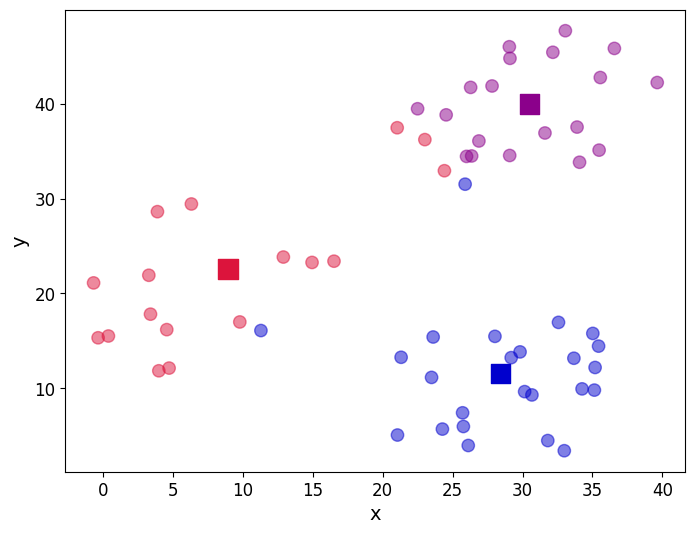

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
plt.scatter(df.iloc[:,0],df.iloc[:,1],marker='o',c=df['centroid'].astype('category'),cmap=customcmap,s=80,alpha=0.5)

plt.scatter(centroids.iloc[:,0],centroids.iloc[:,1],marker='s',s=200,c=[0,1,2],cmap=customcmap)
ax.set_xlabel(r'x',fontsize=14)
ax.set_ylabel(r'y',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
def kmeans(dset,k=2,tol=1e-4):
    working_dset=dset.copy()
    err=[]
    goahead=True
    j=0

    centroids=initiate_centroids(k,dset)

    while(goahead):
      working_dset['centroid'],j_err=centroid_assignation(working_dset,centroids)
      err.append(sum(j_err))

      centroids=working_dset.groupby('centroid').agg('mean').reset_index(drop=True)

      if j>0:
        if err[j-1]-err[j]<=tol:
          goahead=False
      j+=1
    working_dset['centroid'],j_err=centroid_assignation(working_dset,centroids)
    centroids=working_dset.groupby('centroid').agg('mean').reset_index(drop=True)
    return working_dset['centroid'],j_err,centroids

In [ ]:
np.random.seed(42)
df['centroid'],df['error'],centroids=kmeans(df[['x','y']],3)
df.head()

,x,y,centroid,error
0,24.412,32.932,2,3732.447342
1,35.190,12.189,1,1399.889001
2,26.288,41.718,2,267.056707
3,0.376,15.506,0,2683.086425
4,26.116,3.963,1,2723.650198


In [ ]:
centroids

,x,y
0,6.322867,19.559800
1,29.330864,10.432409
2,29.304957,39.027304


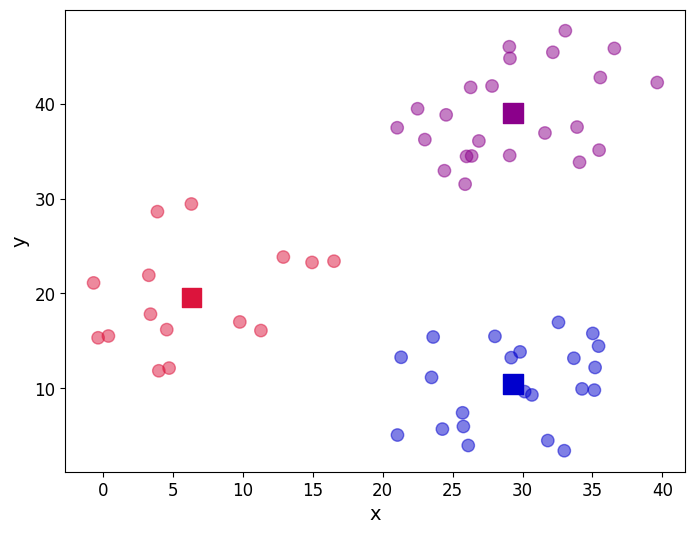

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
plt.scatter(df.iloc[:,0],df.iloc[:,1],marker='o',c=df['centroid'].astype('category'),cmap=customcmap,s=80,alpha=0.5)

plt.scatter(centroids.iloc[:,0],centroids.iloc[:,1],marker='s',s=200,c=[0,1,2],cmap=customcmap)
ax.set_xlabel(r'x',fontsize=14)
ax.set_ylabel(r'y',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

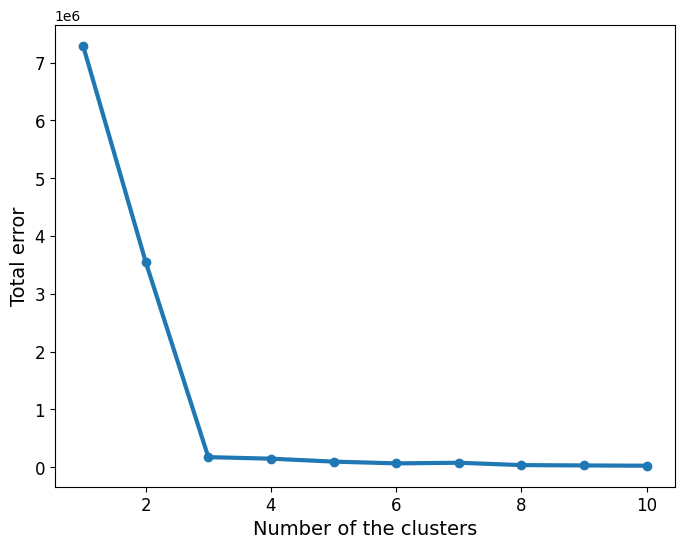

In [ ]:
err_total=[]
n=10
df_elbow=blobs[['x','y']]
for i in range(n):
  _,my_errs,_=kmeans(df_elbow,i+1)
  err_total.append(sum(my_errs))

fig,ax=plt.subplots(figsize=(8,6))
plt.plot(range(1,n+1),err_total,linewidth=3,marker='o')
ax.set_xlabel(r'Number of the clusters',fontsize=14)
ax.set_ylabel(r'Total error',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

**Thuật toán K-medians**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
blobs=pd.read_excel('/content/drive/MyDrive/DataMining/kmeans.xlsx')
colnames=list(blobs.columns[1:-1])
blobs.head()

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


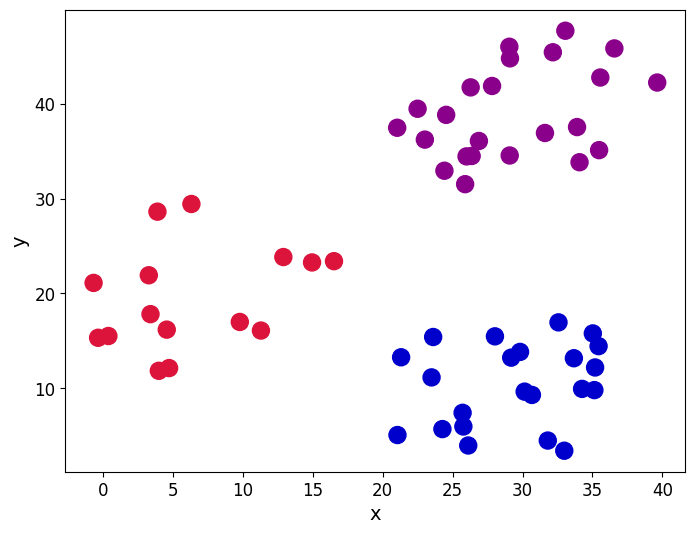

In [ ]:
customcmap=ListedColormap(["crimson","mediumblue","darkmagenta"])
fig,ax=plt.subplots(figsize=(8,6))
plt.scatter(x=blobs['x'],y=blobs['y'],s=150,c=blobs['cluster'].astype('category'),cmap=customcmap)

ax.set_xlabel(r'x',fontsize=14)
ax.set_ylabel(r'y',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
def initiate_centroids(k,dset):
  centroids=dset.sample(k)
  return centroids

np.random.seed(42)
k=3
df=blobs[['x','y']]
centroids=initiate_centroids(k,df)
centroids

,x,y
0,24.412,32.932
5,25.893,31.515
36,26.878,36.069


In [ ]:
def manhattan_distance(a, b):
  return np.sum(np.abs(a - b))

for i,centroid in enumerate(range(centroids.shape[0])):
  err=manhattan_distance(centroids.iloc[centroid,:],df.iloc[36,:])
  print('Error for centroid {0} : {1:.2f}'.format(i,err))

Error for centroid 0 : 5.60
Error for centroid 1 : 5.54
Error for centroid 2 : 0.00


In [ ]:
def centroid_assignation(dset, centroids):
  k = centroids.shape[0]
  n = dset.shape[0]
  assignation = []
  assign_errors = []
  for obs in range(n):
    all_errors = np.array([])
    for centroid in range(k):
      err = manhattan_distance(centroids.iloc[centroid, :], dset.iloc[obs, :])
      all_errors = np.append(all_errors, err)

    nearest_centroid = np.where(all_errors == np.amin(all_errors))[0].tolist()[0]
    nearest_centroid_error = np.amin(all_errors)
    assignation.append(nearest_centroid)
    assign_errors.append(nearest_centroid_error)
  return assignation, assign_errors

In [ ]:
df['centroid'],df['error']=centroid_assignation(df,centroids)
df.head()

<ipython-input-14-20d1f1802177>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'],df['error']=centroid_assignation(df,centroids)


,x,y,centroid,error
0,24.412,32.932,0,0.000
1,35.190,12.189,1,28.623
2,26.288,41.718,2,6.239
3,0.376,15.506,0,41.462
4,26.116,3.963,1,27.775


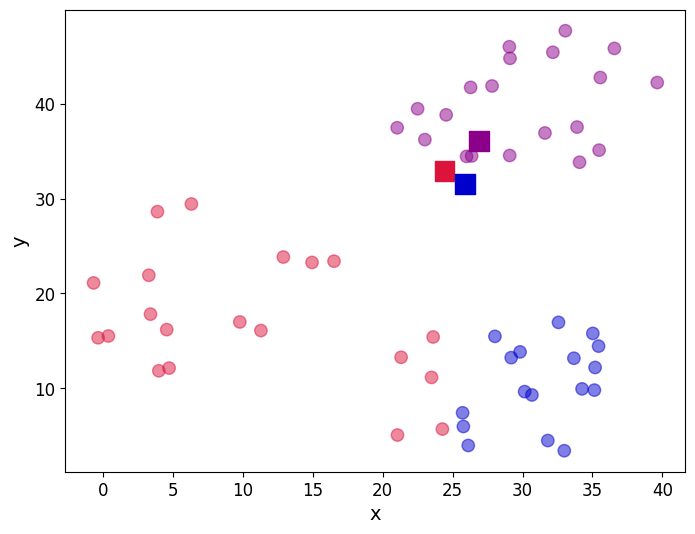

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
plt.scatter(df.iloc[:,0],df.iloc[:,1],marker='o',c=df['centroid'].astype('category'),cmap=customcmap,s=80,alpha=0.5)

plt.scatter(centroids.iloc[:,0],centroids.iloc[:,1],marker='s',s=200,c=[0,1,2],cmap=customcmap)
ax.set_xlabel(r'x',fontsize=14)
ax.set_ylabel(r'y',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
print('the total error is {0:.2f}'.format(df['error'].sum()))

the total error is 1230.87


In [ ]:
def median_update(dset, centroids):
    k = centroids.shape[0]
    updated_centroids = pd.DataFrame(columns=dset.columns)

    for centroid in range(k):
        cluster_data = dset[dset['centroid'] == centroid].copy()
        cluster_data_sorted = cluster_data.sort_values(by=cluster_data.columns.tolist())

        # Tính trung vị của từng thuộc tính trong cụm
        median = cluster_data_sorted.median(axis=0)

        updated_centroids = updated_centroids.append(median, ignore_index=True)

    return updated_centroids



centroids=median_update(df,centroids)

<ipython-input-17-06c480479620>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_centroids = updated_centroids.append(median, ignore_index=True)
<ipython-input-17-06c480479620>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_centroids = updated_centroids.append(median, ignore_index=True)
<ipython-input-17-06c480479620>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_centroids = updated_centroids.append(median, ignore_index=True)


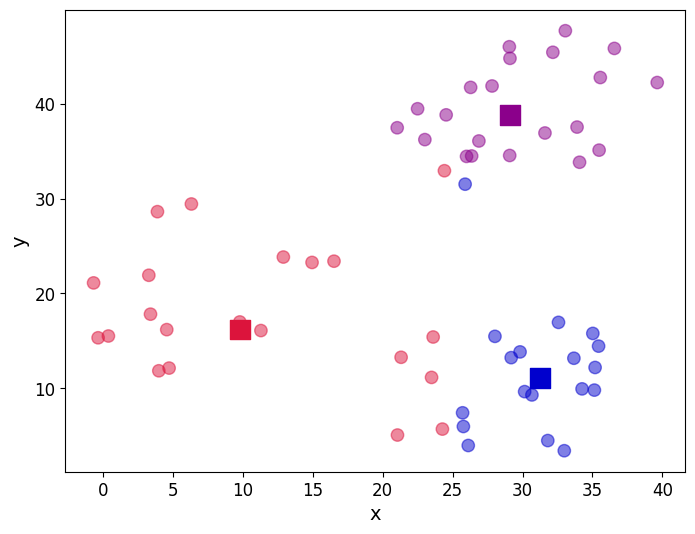

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
plt.scatter(df.iloc[:,0],df.iloc[:,1],marker='o',c=df['centroid'].astype('category'),cmap=customcmap,s=80,alpha=0.5)

plt.scatter(centroids.iloc[:,0],centroids.iloc[:,1],marker='s',s=200,c=[0,1,2],cmap=customcmap)
ax.set_xlabel(r'x',fontsize=14)
ax.set_ylabel(r'y',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
def kmedians(dset, k=2, tol=1e-4):
  working_dset = dset.copy()
  err = []
  goahead = True
  j = 0

  centroids = initiate_centroids(k, dset)

  while goahead:
    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    err.append(sum(j_err))

    centroids = median_update(working_dset, centroids)

    if j > 0:
      if err[j-1] - err[j] <= tol:
        goahead = False
    j += 1

  working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
  centroids = median_update(working_dset, centroids)
  return working_dset['centroid'], j_err, centroids

In [ ]:
np.random.seed(42)
df['centroid'],df['error'],centroids=kmedians(df[['x','y']],3)
df.head()

<ipython-input-17-06c480479620>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_centroids = updated_centroids.append(median, ignore_index=True)
<ipython-input-17-06c480479620>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_centroids = updated_centroids.append(median, ignore_index=True)
<ipython-input-17-06c480479620>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_centroids = updated_centroids.append(median, ignore_index=True)
<ipython-input-17-06c480479620>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_centroids = updated_centroids.append(median, ignore_index=True)
<ipython-input-17-06c4804796

,x,y,centroid,error
0,24.412,32.932,2,9.2470
1,35.190,12.189,1,6.8565
2,26.288,41.718,2,6.9510
3,0.376,15.506,0,6.4780
4,26.116,3.963,1,10.4435


In [ ]:
centroids

,x,y,centroid
0,4.550,17.8100,0.0
1,29.986,10.5365,1.0
2,29.056,37.5350,2.0


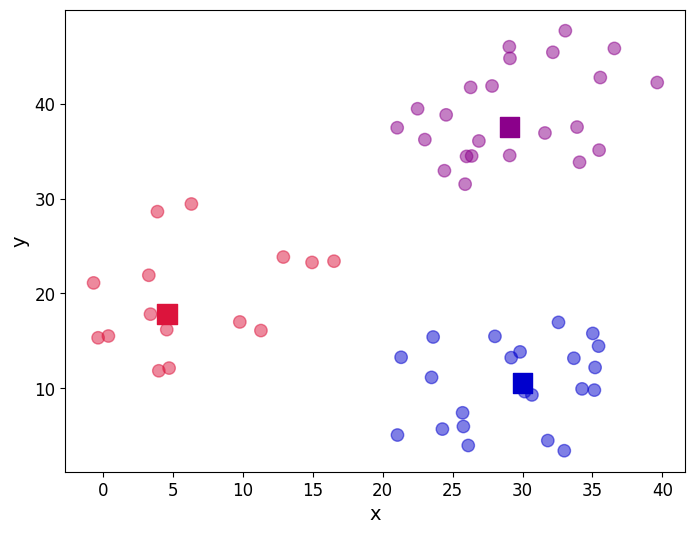

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
plt.scatter(df.iloc[:,0],df.iloc[:,1],marker='o',c=df['centroid'].astype('category'),cmap=customcmap,s=80,alpha=0.5)

plt.scatter(centroids.iloc[:,0],centroids.iloc[:,1],marker='s',s=200,c=[0,1,2],cmap=customcmap)
ax.set_xlabel(r'x',fontsize=14)
ax.set_ylabel(r'y',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<ipython-input-17-06c480479620>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_centroids = updated_centroids.append(median, ignore_index=True)
<ipython-input-17-06c480479620>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_centroids = updated_centroids.append(median, ignore_index=True)
<ipython-input-17-06c480479620>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_centroids = updated_centroids.append(median, ignore_index=True)
<ipython-input-17-06c480479620>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_centroids = updated_centroids.append(median, ignore_index=True)
<ipython-input-17-06c4804796

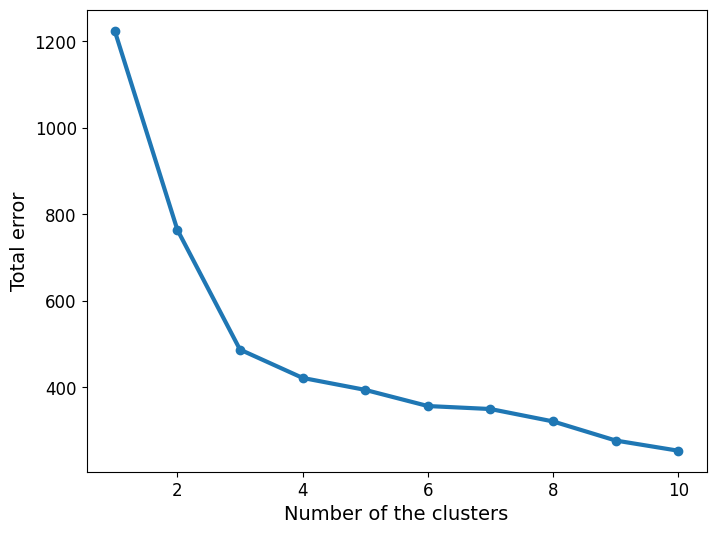

In [ ]:
err_total=[]
n=10
df_elbow=blobs[['x','y']]
for i in range(n):
  _,my_errs,_=kmedians(df_elbow,i+1)
  err_total.append(sum(my_errs))

fig,ax=plt.subplots(figsize=(8,6))
plt.plot(range(1,n+1),err_total,linewidth=3,marker='o')
ax.set_xlabel(r'Number of the clusters',fontsize=14)
ax.set_ylabel(r'Total error',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()